# Checking results in summary.json files generated by nnUNet

In [2]:
# imports
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# path to predicted data
data_path = '../../../nnUNet_data/nnUNet_raw/Dataset361_Menisci/'

# list subfolders at this path
subfolders = [f.name for f in os.scandir(data_path) if f.is_dir()]
subfolders

['ResEnc_3d_bs4_predsTs',
 'imagesTs_skmtea',
 'clahe_predsTs',
 'clip_rescale_predsTs',
 'zscore_predsTs_skmtea',
 'labelsTs',
 'ResEnc_3d_bs4_predsTs_skmtea',
 'zscore_predsTs',
 'labelsTr',
 'hist_eq_predsTs',
 'hist_eq_predsTs_skmtea',
 'clip_rescale_predsTs_skmtea',
 'imagesTr',
 'clahe_predsTs_skmtea',
 'labelsTs_skmtea',
 'imagesTs']

In [3]:
# function to take json file and return array of dice scores
def get_dice_scores(json_file):
    with open(json_file) as f:
        data = json.load(f)

    # Extract Dice scores from "metric_per_case"
    dice_scores = [
        case["metrics"]["1"]["Dice"] for case in data["metric_per_case"]
    ]

    return dice_scores

In [4]:
# Get dice scores from zscore_predsTs folder
json_path = os.path.join(data_path, 'zscore_predsTs', 'summary.json')
zscore_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Zscore Results")
print(f"Mean Dice score: {np.mean(zscore_dice_scores):.4f}")
print(f"Std Dice score: {np.std(zscore_dice_scores):.4f}")

Zscore Results
Mean Dice score: 0.8923
Std Dice score: 0.0271


In [5]:
# Get dice scores from clip_rescale_predsTs folder
json_path = os.path.join(data_path, 'clip_rescale_predsTs', 'summary.json')
clip_rescale_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Clip Rescale Results")
print(f"Mean Dice score: {np.mean(clip_rescale_dice_scores):.4f}")
print(f"Std Dice score: {np.std(clip_rescale_dice_scores):.4f}")

Clip Rescale Results
Mean Dice score: 0.8909
Std Dice score: 0.0273


In [6]:
# Get dice scores from hist_eq_predsTs folder
json_path = os.path.join(data_path, 'hist_eq_predsTs', 'summary.json')
hist_eq_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Hist Eq Results")
print(f"Mean Dice score: {np.mean(hist_eq_dice_scores):.4f}")
print(f"Std Dice score: {np.std(hist_eq_dice_scores):.4f}")

Hist Eq Results
Mean Dice score: 0.8888
Std Dice score: 0.0286


In [9]:
# get dice scores from clahe_predsTs folder
json_path = os.path.join(data_path, 'clahe_predsTs', 'summary.json')
clahe_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Clahe Results")
print(f"Mean Dice score: {np.mean(clahe_dice_scores):.4f}")
print(f"Std Dice score: {np.std(clahe_dice_scores):.4f}")

Clahe Results
Mean Dice score: 0.8906
Std Dice score: 0.0297


In [10]:
# Get dice scores from ResEnc_3d_bs4_predsTs folder
json_path = os.path.join(data_path, 'ResEnc_3d_bs4_predsTs', 'summary.json')
resenc_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("ResEnc Results")
print(f"Mean Dice score: {np.mean(resenc_dice_scores):.4f}")
print(f"Std Dice score: {np.std(resenc_dice_scores):.4f}")

ResEnc Results
Mean Dice score: 0.8929
Std Dice score: 0.0267


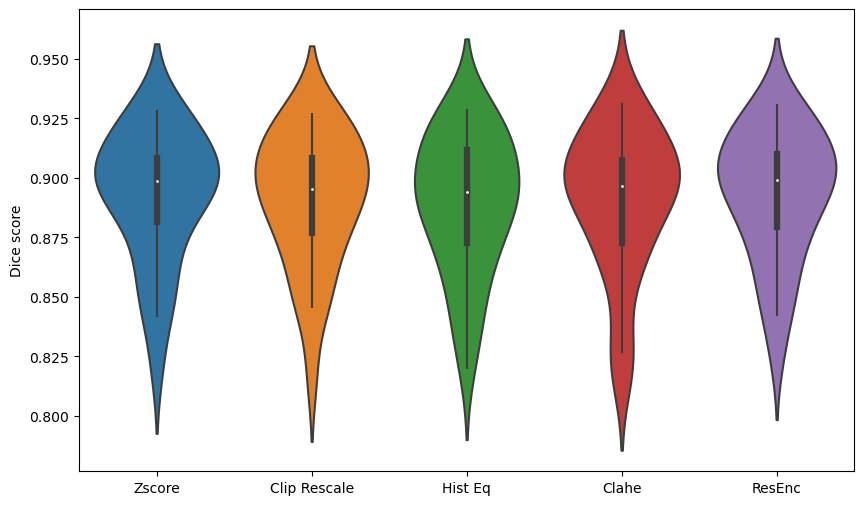

In [11]:
# plot a violin plot of the three sets of dice scores
df = pd.DataFrame({
    "Zscore": zscore_dice_scores,
    "Clip Rescale": clip_rescale_dice_scores,
    "Hist Eq": hist_eq_dice_scores,
    "Clahe": clahe_dice_scores,
    "ResEnc": resenc_dice_scores
})

plt.figure(figsize=(10, 6))
sns.violinplot(data=df)
plt.ylabel("Dice score")
plt.show()

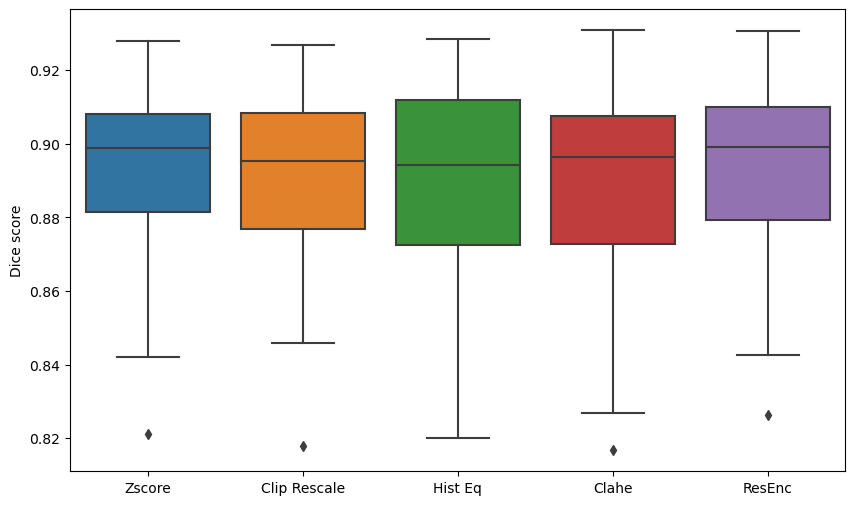

In [12]:
# plot box plot of dice scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.ylabel("Dice score")
plt.show()

## External Validation Results

In [13]:
# Get dice scores from zscore_predsTs_skmtea folder
json_path = os.path.join(data_path, 'zscore_predsTs_skmtea', 'summary.json')
zscore_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Zscore Results - External")
print(f"Mean Dice score: {np.mean(zscore_dice_scores):.4f}")
print(f"Std Dice score: {np.std(zscore_dice_scores):.4f}")

Zscore Results - External
Mean Dice score: 0.7976
Std Dice score: 0.0466


In [14]:
# Get dice scores from clip_rescale_predsTs_skmtea folder
json_path = os.path.join(data_path, 'clip_rescale_predsTs_skmtea', 'summary.json')
clip_rescale_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Clip Rescale Results - External")
print(f"Mean Dice score: {np.mean(clip_rescale_dice_scores):.4f}")
print(f"Std Dice score: {np.std(clip_rescale_dice_scores):.4f}")

Clip Rescale Results - External
Mean Dice score: 0.7925
Std Dice score: 0.0468


In [15]:
# Get dice scores from hist_eq_predsTs_skmtea folder
json_path = os.path.join(data_path, 'hist_eq_predsTs_skmtea', 'summary.json')
hist_eq_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Hist Eq Results - External")
print(f"Mean Dice score: {np.mean(hist_eq_dice_scores):.4f}")
print(f"Std Dice score: {np.std(hist_eq_dice_scores):.4f}")

Hist Eq Results - External
Mean Dice score: 0.7920
Std Dice score: 0.0448


In [16]:
# Get dice scores from clahe_predsTs_skmtea folder
json_path = os.path.join(data_path, 'clahe_predsTs_skmtea', 'summary.json')
clahe_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Clahe Results - External")
print(f"Mean Dice score: {np.mean(clahe_dice_scores):.4f}")
print(f"Std Dice score: {np.std(clahe_dice_scores):.4f}")

Clahe Results - External
Mean Dice score: 0.7984
Std Dice score: 0.0433


In [17]:
# Get dice scores from ResEnc_3d_bs4_predsTs_skmtea folder
json_path = os.path.join(data_path, 'ResEnc_3d_bs4_predsTs_skmtea', 'summary.json')
resenc_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("ResEnc Results - External")
print(f"Mean Dice score: {np.mean(resenc_dice_scores):.4f}")
print(f"Std Dice score: {np.std(resenc_dice_scores):.4f}")

ResEnc Results - External
Mean Dice score: 0.7927
Std Dice score: 0.0448


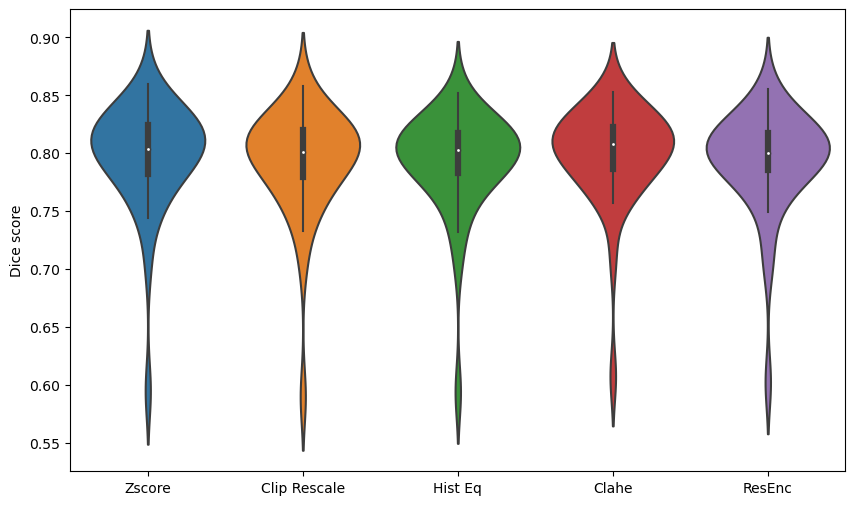

In [18]:
# plot a violin plot of the external dice scores
external_df = pd.DataFrame({
    "Zscore": zscore_dice_scores,
    "Clip Rescale": clip_rescale_dice_scores,
    "Hist Eq": hist_eq_dice_scores,
    "Clahe": clahe_dice_scores,
    "ResEnc": resenc_dice_scores
})

plt.figure(figsize=(10, 6))
sns.violinplot(data=external_df)
plt.ylabel("Dice score")
plt.show()

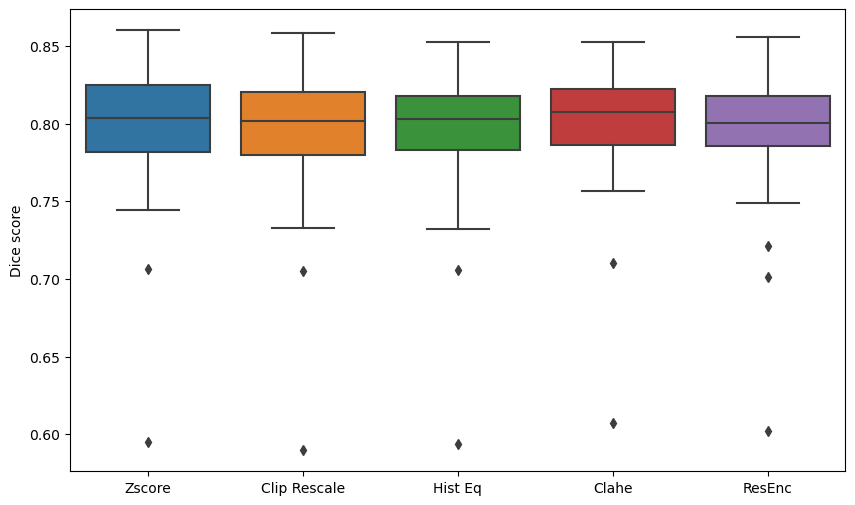

In [19]:
# plot box plot of dice scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=external_df)
plt.ylabel("Dice score")
plt.show()

In [22]:
# remove outliers
external_df = external_df[external_df["Zscore"] > 0.6]

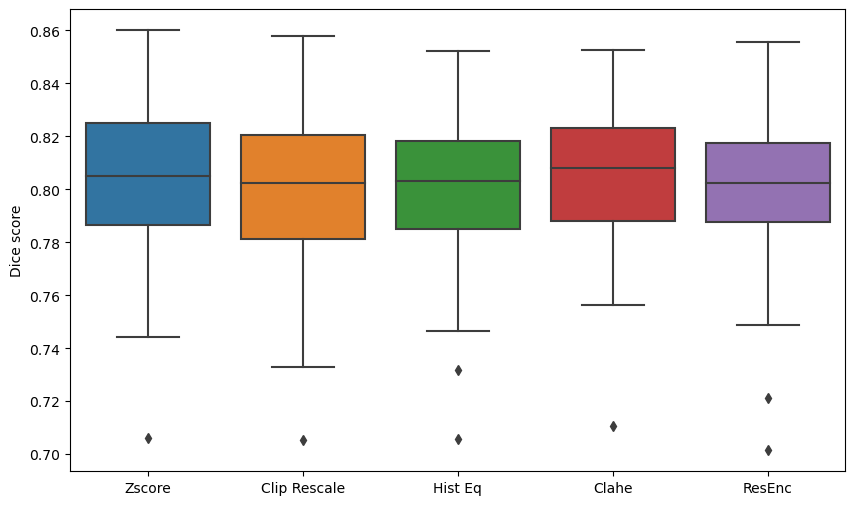

In [23]:
# plot box plot of dice scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=external_df)
plt.ylabel("Dice score")
plt.show()

In [24]:
# Are any of the differences statistically significant?
from scipy.stats import ttest_ind

# perform t-test between all pairs of methods
methods = external_df.columns
for i, method1 in enumerate(methods):
    for method2 in methods[i + 1:]:
        t_stat, p_val = ttest_ind(external_df[method1], external_df[method2])
        print(f"{method1} vs {method2}: p-value = {p_val:.4f}")

Zscore vs Clip Rescale: p-value = 0.5184
Zscore vs Hist Eq: p-value = 0.4514
Zscore vs Clahe: p-value = 0.9467
Zscore vs ResEnc: p-value = 0.5027
Clip Rescale vs Hist Eq: p-value = 0.9322
Clip Rescale vs Clahe: p-value = 0.4600
Clip Rescale vs ResEnc: p-value = 0.9865
Hist Eq vs Clahe: p-value = 0.3924
Hist Eq vs ResEnc: p-value = 0.9454
Clahe vs ResEnc: p-value = 0.4438


In [25]:
# What about for the internal data?
# perform t-test between all pairs of methods
methods = df.columns
for i, method1 in enumerate(methods):
    for method2 in methods[i + 1:]:
        t_stat, p_val = ttest_ind(df[method1], df[method2])
        print(f"{method1} vs {method2}: p-value = {p_val:.4f}")

Zscore vs Clip Rescale: p-value = 0.8479
Zscore vs Hist Eq: p-value = 0.6406
Zscore vs Clahe: p-value = 0.8214
Zscore vs ResEnc: p-value = 0.9411
Clip Rescale vs Hist Eq: p-value = 0.7800
Clip Rescale vs Clahe: p-value = 0.9662
Clip Rescale vs ResEnc: p-value = 0.7896
Hist Eq vs Clahe: p-value = 0.8211
Hist Eq vs ResEnc: p-value = 0.5879
Clahe vs ResEnc: p-value = 0.7660
